### Mounting 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import os

train_dir = "/content/gdrive/MyDrive/Colab Notebooks/Matkul Kecerdasan Buatan /tubes/betelleaf/train"
val_dir = "/content/gdrive/MyDrive/Colab Notebooks/Matkul Kecerdasan Buatan /tubes/betelleaf/val"

diseased_train_path = train_dir + '/diseased'
healthy_train_path = train_dir + '/healthy'
diseased_val_path = val_dir + '/diseased'
healthy_val_path = val_dir + '/healthy'

diseased_len_train = len(os.listdir(diseased_train_path))
healthy_len_train = len(os.listdir(healthy_train_path))
diseased_len_val = len(os.listdir(diseased_val_path))
healthy_len_val = len(os.listdir(healthy_val_path))

print("jumlah dataset Training : ", diseased_len_train + healthy_len_train)
print("jumlah dataset validasi : ", diseased_len_val + healthy_len_val)
print("\n\n")
print("jumlah train kelas Diseased : ", diseased_len_train)
print("jumlah train kelas Healthy : ", healthy_len_train)
print("jumlah validasi kelas Diseased : ", diseased_len_val)
print("jumlah validasi kelas Healthy : ", healthy_len_val)

jumlah dataset Training :  500
jumlah dataset validasi :  174



jumlah train kelas Diseased :  250
jumlah train kelas Healthy :  250
jumlah validasi kelas Diseased :  87
jumlah validasi kelas Healthy :  87


In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.15,
      zoom_range=0.15,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(220, 220),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(220, 220),
        batch_size=10,
        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
callbacks = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/gdrive/MyDrive/Colab Notebooks/Matkul Kecerdasan Buatan/tubes/callback.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [7]:
VGG16_base = tf.keras.applications.VGG16(include_top=False, weights='imagenet', #include_top = false , berarti fully connected layer akan dipidah dari arsitektur
                                                 input_tensor=None, input_shape=(220, 220,3))

58900480/58889256 [==============================] - 0s 0us/step


In [8]:
VGG16_base.trainable = False

In [9]:
print('Adding new layers.')
output = VGG16_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(256,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(256,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output) 
print('New layers Finishing Added!')

Adding new layers.
New layers Finishing Added!


In [10]:
VGG16_model = Model(VGG16_base.input, output)

VGG16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 220, 220, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 220, 220, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 220, 220, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 110, 110, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 110, 110, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 110, 110, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 55, 55, 128)       0     

In [11]:
VGG16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss='binary_crossentropy', 
                    metrics =['accuracy'])

In [12]:
history = VGG16_model.fit(
      train_generator,
      steps_per_epoch=50,  # 500 images = batch_size * steps
      epochs=40,
      validation_data=validation_generator,
      validation_steps=18,  # 174 images = batch_size * steps
      callbacks = [callbacks, best_model])

Epoch 1/40
50/50 [==============================] - ETA: 0s - loss: 0.4819 - accuracy: 0.7720
Epoch 00001: val_accuracy improved from -inf to 0.91379, saving model to /content/gdrive/MyDrive/Colab Notebooks/Matkul Kecerdasan Buatan/tubes/callback.h5
50/50 [==============================] - 275s 5s/step - loss: 0.4819 - accuracy: 0.7720 - val_loss: 0.2685 - val_accuracy: 0.9138
Epoch 2/40
50/50 [==============================] - ETA: 0s - loss: 0.2301 - accuracy: 0.9040
Epoch 00002: val_accuracy improved from 0.91379 to 1.00000, saving model to /content/gdrive/MyDrive/Colab Notebooks/Matkul Kecerdasan Buatan/tubes/callback.h5
50/50 [==============================] - 28s 557ms/step - loss: 0.2301 - accuracy: 0.9040 - val_loss: 0.1130 - val_accuracy: 1.0000
Epoch 3/40
50/50 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.9460
Epoch 00003: val_accuracy did not improve from 1.00000
50/50 [==============================] - 26s 531ms/step - loss: 0.1542 - accuracy: 0.9

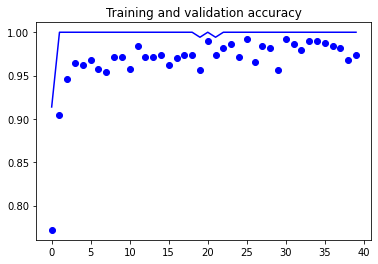

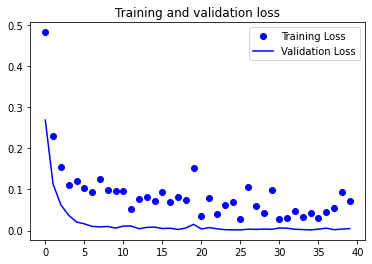

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [18]:
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Matkul Kecerdasan Buatan/tubes/callback.h5'
model = load_model(model_path)

Found 174 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 1.0
Precision : 1.0
f1Score : 1.0
[[87  0]
 [ 0 87]]


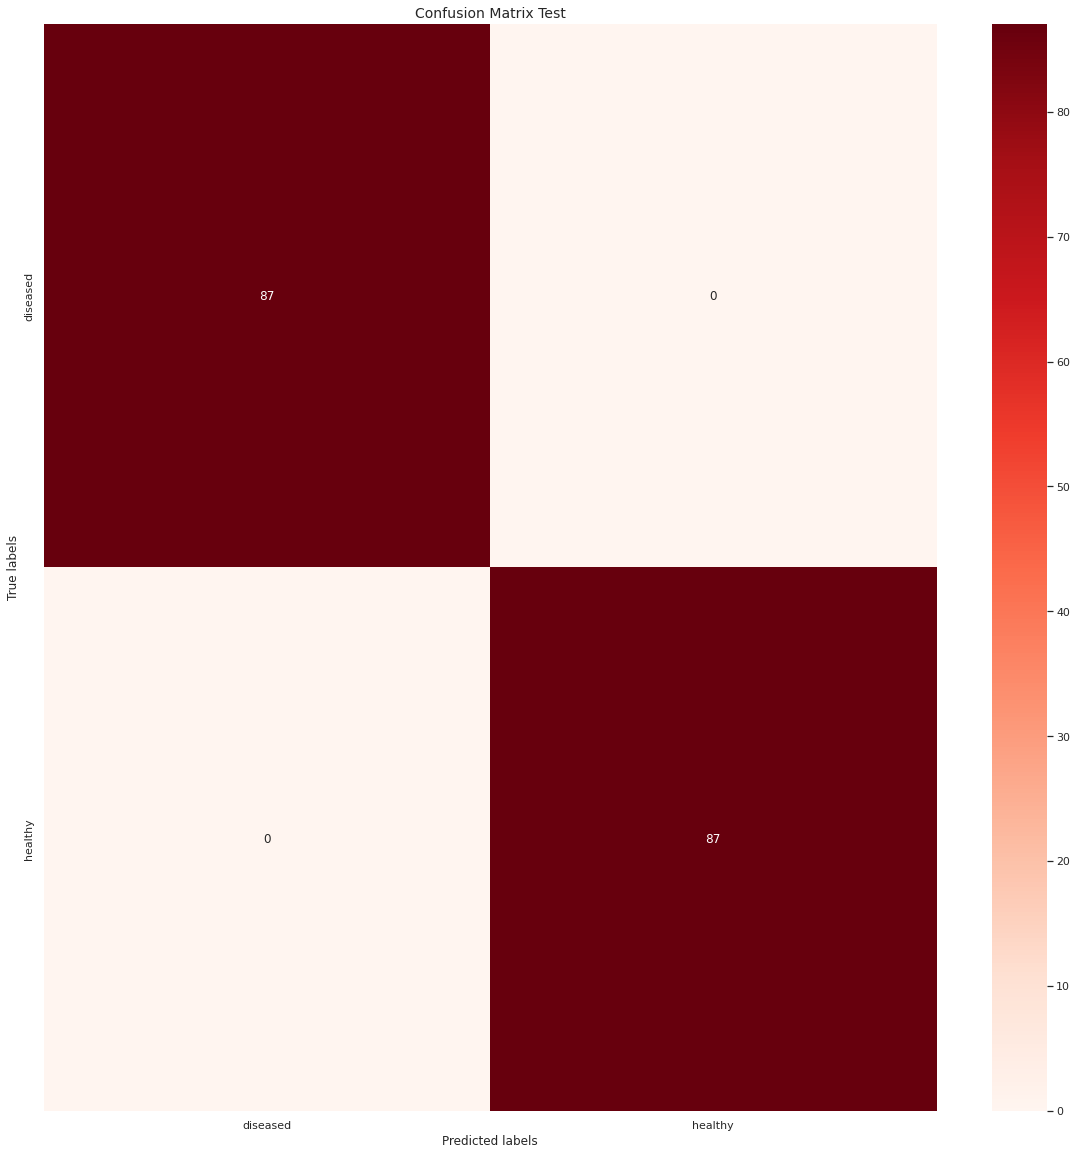

In [19]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=220; width=220
batch_size=10

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/gdrive/MyDrive/Colab Notebooks/Matkul Kecerdasan Buatan /tubes/betelleaf/val'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

    diseased       1.00      1.00      1.00        87
     healthy       1.00      1.00      1.00        87

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174

